# ISE 447 - Financial Optimization - HW 2

## Jack Dean
## Lehigh University

Due Date: Monday March 21st, 2022  
Total: 100 Points  
*Note*: Under otherwise stated, all textbook references are for “Optimization Methods in Finance”

In [1]:
'''Packages used in this work'''
import numpy as np
import pandas as pd
import scipy.stats as stats
import pulp
from pulp import *
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1 -- Reformulating Linear Programs & Duality (10 Points)

Consider the modified version of the fund allocation problem considered in HW 1, Question 5.  Recall that a linear program in standard form is
$$\min c^Tx$$
$$\mathrm{s.t.}\; Ax=b$$
$$x \geq 0$$
First reformulate the modified version of the fund allocation problem considered in HW 1, Question 5, in standard form.  Then find the linear programming dual associated to it.

### RECALL: Modified Fund Allocation Problem (as in HQ 1 Solutions)

$$\max 0.10f_1 + 0.15f_2 + 0.16f_3 + 0.08f_4$$
$$\mathrm{s.t.}\;\;\; f_1 + f_2 + f_3 + f_4 + s = 80,000$$
$$0.50f_1 + 0.30f_2 + 0.25f_3 + 0.60f_4 \geq 0.35 * (f_1 + f_2 + f_3 + f_4)$$
$$0.30f_1 + 0.10f_2 + 0.40f_3 + 0.20f_4 \geq 0.30 * (f_1 + f_2 + f_3 + f_4)$$
$$0.20f_1 + 0.60f_2 + 0.35f_3 + 0.20f_4 \geq 0.15 * (f_1 + f_2 + f_3 + f_4)$$
$$s - \alpha0.50f_1 - \alpha0.30f_2 - \alpha0.25f_3 - \alpha0.60f_4 \geq 0$$
$$$$
$$f_1,f_2,f_3,f_4,s \geq 0$$

### Solution

## Problem 2 -- Linear Programming Duality (Based on Exercise 2.3 in Textbook) (10 Points)

Consider a Linear Program of the Form:
$$\max c^Tx$$
$$\mathrm{s.t.} \; Ax\leq b$$
$$x \geq 0$$
where
$$A = \begin{pmatrix}
1 & 1 & 1 & 1 & 1\\
5 & 4 & 3 & 2 & 1\\
\end{pmatrix},\;\;\; b = \begin{pmatrix}
3\\
14\\
\end{pmatrix},\;\;\;
c=\begin{pmatrix}
6\\
5\\
4\\
3\\
5
\end{pmatrix}$$
First, obtain the dual of this problem. Now solve the dual problem that you obtain using your favorite solver. Does the objective of the dual LP tells you something about the objective value of the original problem?


*Hint*: notice that the problem is in “dual form”, so in a sense you are really looking for the primal associated to this dual  
*Note*: because it has only two variables, you could also solve the problem by the graphical method

### Solution

$$\min b^Tx$$
$$\mathrm{s.t.} \; A^Tx\geq c$$
$$x\geq 0$$

$$A^T = \begin{pmatrix}
1 & 5 \\
1 & 4 \\
1 & 3 \\
1 & 2 \\
1 & 1
\end{pmatrix}$$

In [2]:
dec_vars   = ['x1', 'x2']
opt_coef   = dict(zip(dec_vars, [3, 14]))
cons_one   = dict(zip(dec_vars, [1, 5]))
cons_two   = dict(zip(dec_vars, [1, 4]))
cons_three = dict(zip(dec_vars, [1, 3]))
cons_four  = dict(zip(dec_vars, [1, 2]))
cons_five  = dict(zip(dec_vars, [1, 1]))

x          = LpVariable.dicts('Decision Variables',dec_vars,lowBound=0)

problem    = LpProblem('Dual Problem', LpMinimize)
problem   += lpSum([opt_coef[i] * x[i] for i in dec_vars])
problem   += lpSum([cons_one[i] * x[i] for i in dec_vars]) >= 6
problem   += lpSum([cons_two[i] * x[i] for i in dec_vars]) >= 5
problem   += lpSum([cons_three[i] * x[i] for i in dec_vars]) >= 4
problem   += lpSum([cons_four[i] * x[i] for i in dec_vars]) >= 3
problem   += lpSum([cons_five[i] * x[i] for i in dec_vars]) >= 5

problem.solve()
print(problem)
print('FINAL DECISION VARIABLE VALUES')
for v in problem.variables():
    print(v.name + ': ' + str(v.varValue))

Dual_Problem:
MINIMIZE
3*Decision_Variables_x1 + 14*Decision_Variables_x2 + 0
SUBJECT TO
_C1: Decision_Variables_x1 + 5 Decision_Variables_x2 >= 6

_C2: Decision_Variables_x1 + 4 Decision_Variables_x2 >= 5

_C3: Decision_Variables_x1 + 3 Decision_Variables_x2 >= 4

_C4: Decision_Variables_x1 + 2 Decision_Variables_x2 >= 3

_C5: Decision_Variables_x1 + Decision_Variables_x2 >= 5

VARIABLES
Decision_Variables_x1 Continuous
Decision_Variables_x2 Continuous

FINAL DECISION VARIABLE VALUES
Decision_Variables_x1: 4.75
Decision_Variables_x2: 0.25


C:\Users\jdean\AppData\Local\Programs\Python\Python39\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


## Problem 3 -- Dedication and Immunization portfolios (Based on Excercise 3.1 in the Textbook 3.1) (50 Points)

You need to create a portfolio to cover the following stream of liabilities for the next six future periods:

| Period | 1 | 2 | 3 | 4 | 5 | 6 |
| -- | -- | -- | -- | -- | -- | -- |
| Liability | 500 | 200 | 800 | 200 | 800 | 1200 |

For that purpose, you may purchase the bonds in Table 1.

The term structure of risk-free insterest rate is (to be used for Immunization Constraints)

| Period | 1 | 2 | 3 | 4 | 5 | 6 |
| -- | -- | -- | -- | -- | -- | -- |
| Rate | 5.04% | 5.94% | 6.36% | 7.18% | 7.89% | 8.39% |

### Part (a) -- Dedication (10 Points)
Formulate a linear programming model to find the lowest-cost long-only (only buy bonds) dedicated portfolio that covers the stream of liabilities with the bonds above. Assume that surplus balances can be carried from one period to the next but earn no interest. What is the cost of your portfolio? What is the composition of your portfolio?

*Table 1*
| Bond | 1 | 2 | 3 | 4 | 5 | 6 | Price |
| -- | -- | -- | -- | -- | -- | -- | -- |
| 1 | 10 | 10 | 10 | 10 | 10 | 110 | 109 |
| 2 | 7 | 7 | 7 | 7 | 7 | 107 | 94.8 |
| 3 | 8 | 8 | 8 | 8 | 8 | 108 | 99.5 |
| 4 | 6 | 6 | 6 | 6 | 106 | 0 | 93.1 |
| 5 | 7 | 7 | 7 | 7 | 107 | 0 | 97.2 |
| 6 | 6 | 6 | 6 | 106 | 0 | 0 | 93.1 |
| 7 | 5 | 5 | 5 | 105 | 0 | 0 | 97.2 |
| 8 | 10 | 10 | 110 | 0 | 0 | 0 | 110 |
| 9 | 8 | 8 | 108 | 0 | 0 | 0 | 104 |
| 10 | 6 | 6 | 106 | 0 | 0 | 0 | 101 |
| 11 | 10 | 110 | 0 | 0 | 0 | 0 | 107 |
| 12 | 7 | 107 | 0 | 0 | 0 | 0 | 102 |
| 13 | 100 | 0 | 0 | 0 | 0 | 0 | 95.2 |

### Part (b) -- Term Structure (5 Points)
Use the linear programming sensitivity information obtained by solving the problem in Part (a) to determine the implied term structure of interest rates

### Part (c) -- Overpriced Bonds (5 Points)
Using sensitivity analysis information, and in particular the reduced costs associated to the different bonds, can you identify bonds that are overpriced? By how much? Briefly explain.

### Part (d) -- Term Structure cont. (5 Points)
Suppose the streams of liabilities changes to

| Period | 1 | 2 | 3 | 4 | 5 | 6 |
| -- | -- | -- | -- | -- | -- | -- |
| Liability | 100 | 200 | 800 | 200 | 800 | 1200 |

Find the new optimal dedicated portfolio and determine its associated new implied term structure. Is it different from the one you obtained in Part (b)? Can you provide an intuitive explanation for the difference or lack of thereof?

### Part (e) -- Immunization (25 Points)
Using the problem's original data:

#### Sub-Part (i) -- (10 Points)
Find the lowest cost portfolio that matches the present value and duration of the stream of liabilities.

#### Sub-Part (ii) -- (5 Points)
Compare the costs and the cash flow streams vs liabilities of both the Dedication and Immunized portfolio. Discuss the trade-offs of each solution. Briefly explain which portfolio would you prefer.

#### Sub-Part (iii) -- (10 Points)
How does the present value of the Immunized portfolio change if the current rates decrease (all) by 1 percentage point? How does the present value of the Immunized portfolio change if the current rates increase (all) by 1 percentage point? How does the present value of the Immunized portfolio change if the current rates of periods 1, 2 decrease by 1%, of periods 3, 4, 5 increase by 1%, and of period 6 decreases by 1%. Can you draw any conclusions from your results.


### Solution to Part (a)

In [3]:
'''Problem Data'''

'''Liability Stream'''
#        Year: 0   1   2   3   4   5   6
liabilities = [0,500,200,800,200,800,1200]

'''Year of Cashflows Index'''
cf_yr = [0,1,2,3,4,5,6]

'''Bond Options'''
bonds = ['b1','b2','b3','b4','b5','b6','b7','b8','b9','b10','b11','b12','b13']

'''
Bond Cash Flows
NOTE: Original bond price IS included as a negative, representing buying the bond
'''
d = [
    [-109 ,-94.8,-99.5,-93.1,-97.2,-96.3,-92.9,-110 ,-104 ,-101 ,-107 ,-102 ,-95.2],
    [10   ,7    ,8    ,6    ,7    ,6    ,5    ,10   ,8    ,6    ,10   ,7    ,100  ],
    [10   ,7    ,8    ,6    ,7    ,6    ,5    ,10   ,8    ,6    ,110  ,107  ,0    ],
    [10   ,7    ,8    ,6    ,7    ,6    ,5    ,110  ,108  ,106  ,0    ,0    ,0    ],
    [10   ,7    ,8    ,6    ,7    ,106  ,105  ,0    ,0    ,0    ,0    ,0    ,0    ],
    [10   ,7    ,8    ,106  ,107  ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ],
    [110  ,107  ,108  ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ]
    ]

'''DataFrame to combine all related Cash Flows Data'''
df = pd.DataFrame(data=d,index=cf_yr,columns=bonds)
df['liabilities'] = liabilities
df.index.name = 'year'

'''Interest Rate, PV Mechanics, Duration, and Convexity'''
#  Year:      0      1      2      3      4      5      6
rates = [0.0000,0.0504,0.0594,0.0636,0.0718,0.0789,0.0839]
pv_factor = []
for i in range(0,7):
    pv_factor.append(1/(1+rates[i])**i)

dur_factor = []
for i in range(0,7):
    dur_factor.append( i / (1+rates[i]) ** (i+1))

conv_factor = []
for i in range(0,7):
    conv_factor.append( (i * (i+1)) / (1+rates[i]) ** (i+2))

In [4]:
df

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,liabilities
year,,,,,,,,,,,,,,
0,-109,-94.8,-99.5,-93.1,-97.2,-96.3,-92.9,-110,-104,-101,-107,-102,-95.2,0
1,10,7.0,8.0,6.0,7.0,6.0,5.0,10,8,6,10,7,100.0,500
2,10,7.0,8.0,6.0,7.0,6.0,5.0,10,8,6,110,107,0.0,200
3,10,7.0,8.0,6.0,7.0,6.0,5.0,110,108,106,0,0,0.0,800
4,10,7.0,8.0,6.0,7.0,106.0,105.0,0,0,0,0,0,0.0,200
5,10,7.0,8.0,106.0,107.0,0.0,0.0,0,0,0,0,0,0.0,800
6,110,107.0,108.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,1200


In [5]:
'''Primal Solve'''
bond_count = LpVariable.dicts('Bonds',bonds,lowBound=0)
carry = LpVariable.dicts('CashCarry',df.index[0:],lowBound=0)

# Interest Rate
r=0

portfolio = LpProblem('Dedication', LpMinimize)
portfolio += lpSum([df[i][0] * bond_count[i] * (-1) for i in bonds] + carry[0])
for j in df.index[1:]:
    portfolio += lpSum([df[i][j] * bond_count[i] for i in bonds] + carry[j-1]*(1+r) - carry[j]) >= df.iloc[j,-1]  

portfolio.solve()

bonds_fin = dict(zip([v.name[6:] for v in portfolio.variables()], [v.varValue for v in portfolio.variables()]))

print('The minimized portfolio value is : ${:.2f}'.format(value(portfolio.objective)))


The minimized portfolio value is : $2754.28


In [6]:
final_dec = pd.DataFrame(bonds_fin, index=['count'], columns=bonds).transpose()
final_dec.index.name = 'bond'
final_dec['amt'] = final_dec['count'] * df.loc[0] * (-1)
final_dec['pct'] = final_dec['amt'] / value(portfolio.objective)
print('Decision Variable Breakdown')
print(' ')
final_dec

Decision Variable Breakdown
 


,count,amt,pct
bond,,,
b1,0.000000,0.000000,0.000000
b2,0.000000,0.000000,0.000000
b3,11.111111,1105.555544,0.401395
b4,0.000000,0.000000,0.000000
b5,6.645898,645.981305,0.234537
b6,0.609338,58.679246,0.021305
b7,0.000000,0.000000,0.000000
b8,0.000000,0.000000,0.000000
b9,6.119757,636.454770,0.231078


### Solution to Part (b)

In [7]:
'''Dual Solve'''
liability_count = LpVariable.dicts('Liabilities',cf_yr,lowBound=0)

dual = LpProblem('Dedication', LpMaximize)


dual += lpSum([df.transpose().iloc[-1,i] * liability_count[i] for i in df.index[1:]])
dual += lpSum(liability_count[0]) == 1
for j in bonds:
    dual += lpSum([df.transpose().loc[j][i] * liability_count[i] for i in df.index[1:]]) == (-1)*df.transpose().loc[j][0]


dual.solve()

shadow_prices = [1]
for v in dual.variables():
    shadow_prices.append(v.varValue)

print('The minimized portfolio value is : ${:.2f}'.format(value(dual.objective)))

print(' ')
print('The shadow prices are: ')
print(shadow_prices[1:])

The minimized portfolio value is : $2754.28
 
The shadow prices are: 
[1.0, 0.952, 0.88618182, 0.82680135, 0.75764246, 0.68450113, 0.61706468]


In [8]:
'''Confirm Primal-Dual Relationship'''
if abs((value(portfolio.objective) - value(dual.objective))) < 0.0001:
    print('The Primal and Dual Agree')
else:
    print('The Primal and Dual do not Agree')

The Primal and Dual Agree


In [9]:
'''Calculate Implied Yield Curve'''
implied_rates  = [0]
for i in range(1,7):
    implied_rates.append(1 / (shadow_prices[i+1] ** (1/(i))) -1)

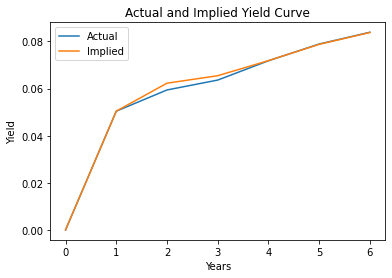

In [10]:
'''Compare Yield Curve'''
plt.plot(rates)
plt.plot(implied_rates)
plt.title('Actual and Implied Yield Curve')
plt.xlabel('Years')
plt.ylabel('Yield')
plt.legend(['Actual','Implied'])

### Solution to Part (c)

In [11]:
'''
Reduced Cost

rc = c - A^Ty
c is portfolio variable values
AT is df.transform
y is shadow prices

'''

c = np.asarray(df.iloc[0,:-1] * (-1))
AT = df.transpose().iloc[:-1,1:].to_numpy()
y = np.asarray(shadow_prices[2:])

reduced_costs = c - np.matmul(AT, y)

final_dec['reduced_cost'] = reduced_costs.round(decimals=3)
final_dec['rich'] = (final_dec['reduced_cost'] > 0)

final_dec

,count,amt,pct,reduced_cost,rich
bond,,,,,
b1,0.000000,0.000000,0.000000,0.052,True
b2,0.000000,0.000000,0.000000,0.024,True
b3,11.111111,1105.555544,0.401395,0.000,False
b4,0.000000,0.000000,0.000000,0.007,True
b5,6.645898,645.981305,0.234537,-0.000,False
b6,0.609338,58.679246,0.021305,0.000,False
b7,0.000000,0.000000,0.000000,0.023,True
b8,0.000000,0.000000,0.000000,0.670,True
b9,6.119757,636.454770,0.231078,-0.000,False


### Solution to Part (d)

In [12]:
'''Liability Stream -- ADJUSTED'''
#        Year: 0   1   2   3   4   5   6
liabilities_adj = [0,100,200,800,200,800,1200]

'''DataFrame to combine all related Cash Flows Data -- ADJUSTED'''
df_adj = pd.DataFrame(data=d,index=cf_yr,columns=bonds)
df_adj['liabilities_adj'] = liabilities_adj
df_adj.index.name = 'year'

In [13]:
df_adj

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,liabilities_adj
year,,,,,,,,,,,,,,
0,-109,-94.8,-99.5,-93.1,-97.2,-96.3,-92.9,-110,-104,-101,-107,-102,-95.2,0
1,10,7.0,8.0,6.0,7.0,6.0,5.0,10,8,6,10,7,100.0,100
2,10,7.0,8.0,6.0,7.0,6.0,5.0,10,8,6,110,107,0.0,200
3,10,7.0,8.0,6.0,7.0,6.0,5.0,110,108,106,0,0,0.0,800
4,10,7.0,8.0,6.0,7.0,106.0,105.0,0,0,0,0,0,0.0,200
5,10,7.0,8.0,106.0,107.0,0.0,0.0,0,0,0,0,0,0.0,800
6,110,107.0,108.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,1200


In [14]:
'''Primal Solve'''
bond_count = LpVariable.dicts('Bonds',bonds,lowBound=0)
carry = LpVariable.dicts('CashCarry',df.index[0:],lowBound=0)

# INTEREST RATE
r=0

portfolio = LpProblem('Dedication', LpMinimize)
portfolio += lpSum([df_adj[i][0] * bond_count[i] * (-1) for i in bonds] + carry[0])

for j in df.index[1:]:
    portfolio += lpSum([df_adj[i][j] * bond_count[i] for i in bonds] + carry[j-1]*(1+r) - carry[j]) == df_adj.iloc[j,-1]  

portfolio.solve()

bonds_fin = dict(zip([v.name[6:] for v in portfolio.variables()], [v.varValue for v in portfolio.variables()]))

print('The minimized portfolio value is : ${:.2f}'.format(value(portfolio.objective)))

The minimized portfolio value is : $2380.86


In [15]:
final_dec = pd.DataFrame(bonds_fin, index=['count'], columns=bonds).transpose()
final_dec.index.name = 'bond'
final_dec['amt'] = final_dec['count'] * df.loc[0] * (-1)
final_dec['pct'] = final_dec['amt'] / value(portfolio.objective)
print('Decision Variable Breakdown')
print(' ')
final_dec

Decision Variable Breakdown
 


,count,amt,pct
bond,,,
b1,0.000000,0.000000,0.000000
b2,11.214953,1063.177544,0.446552
b3,0.000000,0.000000,0.000000
b4,6.806560,633.690708,0.266160
b5,0.000000,0.000000,0.000000
b6,0.000000,0.000000,0.000000
b7,0.768152,71.361329,0.029973
b8,0.000000,0.000000,0.000000
b9,5.890690,612.631812,0.257315


In [16]:
df_adj.transpose()

year,0,1,2,3,4,5,6
b1,-109.0,10.0,10.0,10.0,10.0,10.0,110.0
b2,-94.8,7.0,7.0,7.0,7.0,7.0,107.0
b3,-99.5,8.0,8.0,8.0,8.0,8.0,108.0
b4,-93.1,6.0,6.0,6.0,6.0,106.0,0.0
b5,-97.2,7.0,7.0,7.0,7.0,107.0,0.0
b6,-96.3,6.0,6.0,6.0,106.0,0.0,0.0
b7,-92.9,5.0,5.0,5.0,105.0,0.0,0.0
b8,-110.0,10.0,10.0,110.0,0.0,0.0,0.0
b9,-104.0,8.0,8.0,108.0,0.0,0.0,0.0
b10,-101.0,6.0,6.0,106.0,0.0,0.0,0.0


In [17]:
'''Dual Solve'''
liability_count = LpVariable.dicts('Liabilities',cf_yr)

dual = LpProblem('Dedication', LpMaximize)
dual += lpSum([df_adj.transpose().iloc[-1,i] * liability_count[i] for i in df_adj.index[1:]])
dual += lpSum(liability_count[0]) == 1
dual += lpSum(-liability_count[6]) <= 0
for j in bonds:
    dual += lpSum([df_adj.transpose().loc[j][i] * liability_count[i] for i in df_adj.index[1:]]) <= (-1)*df_adj.transpose().loc[j][0]
for j in range(1,6):
    dual += lpSum(liability_count[j+1] - liability_count[j]) <= 0

dual.solve()

shadow_prices = [1]
print('FINAL DECISION VARIABLE VALUES -- DUAL SOLVE')
for v in dual.variables():
    print(v.name + ': ' + str(v.varValue))
    shadow_prices.append(v.varValue)

print(' ')
print('The minimized portfolio value is : ${:.2f}'.format(value(dual.objective)))

print(' ')
print('The shadow prices are: ')
print(shadow_prices[1:])

FINAL DECISION VARIABLE VALUES -- DUAL SOLVE
Liabilities_0: 1.0
Liabilities_1: 0.83870968
Liabilities_2: 0.83870968
Liabilities_3: 0.83870968
Liabilities_4: 0.76494624
Liabilities_5: 0.69258065
Liabilities_6: 0.62602251
 
The minimized portfolio value is : $2380.86
 
The shadow prices are: 
[1.0, 0.83870968, 0.83870968, 0.83870968, 0.76494624, 0.69258065, 0.62602251]


In [18]:
'''Confirm Primal-Dual Relationship'''
if abs(value(portfolio.objective) - value(dual.objective)) < 0.0001:
    print('The Primal and Dual Agree')
else:
    print('The Primal and Dual do not Agree')

The Primal and Dual Agree


In [19]:
'''Calculate Implied Yield Curve'''
implied_rates  = [0]
for i in range(1,7):
    implied_rates.append(1 / (shadow_prices[i+1] ** (1/(i))) -1)

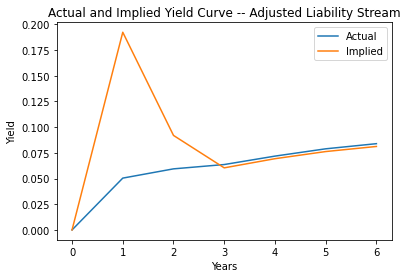

In [20]:
'''Compare Yield Curve'''
plt.plot(rates)
plt.plot(implied_rates)
plt.title('Actual and Implied Yield Curve -- Adjusted Liability Stream')
plt.xlabel('Years')
plt.ylabel('Yield')
plt.legend(['Actual','Implied'])

### Solution to Part (e)

#### Solution to Sub Part (i)

In [21]:
'''Immunization Facts'''

npv = np.matmul(df.iloc[:,-1].to_numpy(),np.asarray(pv_factor))
print('The NPV of the liabilities is ${:.2f}'.format(npv))

dur = np.matmul(df.iloc[:,-1].to_numpy(),np.asarray(dur_factor) )
print('The duration of the liabilites are {:.2f} years'.format(dur/npv))

conv = np.matmul(df.iloc[:,-1].to_numpy(),np.asarray(conv_factor))
print('The convexity of the liabilities are {:.2f}'.format(conv/npv))

The NPV of the liabilities is $2757.94
The duration of the liabilites are 3.58 years
The convexity of the liabilities are 18.88


In [22]:
'''Primal Solve -- Immunization'''
immune_bond_count = LpVariable.dicts('Bonds',bonds,lowBound=0)

immune_portfolio = LpProblem('Immunization', LpMinimize)
immune_portfolio += lpSum([df[i][0] * immune_bond_count[i] * (-1) for i in bonds])
immune_portfolio += lpSum([df[i][1:] * pv_factor[1:] * immune_bond_count[i] for i in bonds]) == npv
immune_portfolio += lpSum([df[i][1:] * dur_factor[1:] * immune_bond_count[i] for i in bonds]) == dur
# Convexity Constraint
# immune_portfolio += lpSum([df[i][1:] * conv_factor[1:] * immune_bond_count[i] for i in bonds]) == conv

immune_portfolio.solve()

bonds_fin = dict(zip([v.name[6:] for v in immune_portfolio.variables()], [v.varValue for v in immune_portfolio.variables()]))
print(' ')
print('The minimized portfolio value is : ${:.2f}'.format(value(immune_portfolio.objective)))

 
The minimized portfolio value is : $2750.69


In [23]:
final_dec = pd.DataFrame(bonds_fin, index=['count'], columns=bonds).transpose()
final_dec.index.name = 'bond'
final_dec['amt'] = final_dec['count'] * df.loc[0] * (-1)
final_dec['pct'] = final_dec['amt'] / value(immune_portfolio.objective)
print('Decision Variable Breakdown')
print(' ')
final_dec

Decision Variable Breakdown
 


,count,amt,pct
bond,,,
b1,0.000000,0.000000,0.000000
b2,0.000000,0.000000,0.000000
b3,13.494459,1342.698671,0.488132
b4,0.000000,0.000000,0.000000
b5,0.000000,0.000000,0.000000
b6,0.000000,0.000000,0.000000
b7,0.000000,0.000000,0.000000
b8,0.000000,0.000000,0.000000
b9,13.538362,1407.989648,0.511868


#### Solution to Sub Part (ii)

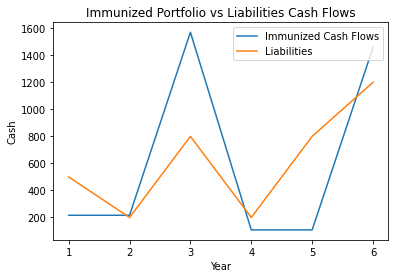

In [24]:
plt.plot((final_dec['count'] * df[1:]).transpose().sum())
plt.plot(df['liabilities'][1:])
plt.title('Immunized Portfolio vs Liabilities Cash Flows')
plt.xlabel('Year')
plt.ylabel('Cash')
plt.legend(['Immunized Cash Flows', 'Liabilities'])

#### Solution to Sub Part (iii)

In [25]:
'''Code Block'''

'Code Block'

## Problem 4 -- Dedication with Bond Ratings (Based on Exercise 3.1 in the Textbook) (10 Points)
Consider basically the same instance of the Dedication portfolio considered in the previous question. However, now the prices of the bonds are a bit different, and for each bond, we are giving his risk rating (think of Moody’s or Bloomberg ratings).

| Bond | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| Price | 108 | 94 | 99 | 92.7 | 96.6 | 95.9 | 92.9 | 100 | 104 | 101 | 107 | 102 | 95.2 |
| Rating | B | B | B | B | B | B | A | A | A | A | A | A | A |

Solve the Dedication portfolio problem of the previous question with the new prices, but this time assume that at most 50% of the money that you invest in Bonds should be allocated to “B” rated Bonds. What is the cost of your portfolio? What is the composition of your portfolio.

### Solution

In [26]:
'''Problem Data'''

'''Liability Stream'''
#        Year: 0   1   2   3   4   5   6
liabilities = ['',0,500,200,800,200,800,1200]

'''Year of Cashflows Index'''
cf_yr = ['rating',0,1,2,3,4,5,6]

'''Bond Options'''
bonds = ['b1','b2','b3','b4','b5','b6','b7','b8','b9','b10','b11','b12','b13']

'''
Bond Cash Flows
NOTE: Original bond price IS included as a negative, representing buying the bond
'''
d = [
    ['B'  ,'B'  ,'B'  ,'B'  ,'B'  ,'B'  ,'A'  ,'A'  ,'A'  ,'A'  ,'A'  ,'A'  ,'A'  ],
    [-108 ,-94  ,-99  ,-92.7,-96.6,-95.9,-92.9,-100 ,-104 ,-101 ,-107 ,-102 ,-95.2],
    [10   ,7    ,8    ,6    ,7    ,6    ,5    ,10   ,8    ,6    ,10   ,7    ,100  ],
    [10   ,7    ,8    ,6    ,7    ,6    ,5    ,10   ,8    ,6    ,110  ,107  ,0    ],
    [10   ,7    ,8    ,6    ,7    ,6    ,5    ,110  ,108  ,106  ,0    ,0    ,0    ],
    [10   ,7    ,8    ,6    ,7    ,106  ,105  ,0    ,0    ,0    ,0    ,0    ,0    ],
    [10   ,7    ,8    ,106  ,107  ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ],
    [110  ,107  ,108  ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ]
    ]

'''DataFrame to combine all related Cash Flows Data'''
rating_df = pd.DataFrame(data=d,index=cf_yr,columns=bonds)
rating_df['liabilities'] = liabilities
rating_df.index.name = 'year'

'''Interest Rate and Present Value Mechanics'''
#  Year:      0      1      2      3      4      5      6
rates = [0,0.0000,0.0504,0.0594,0.0636,0.0718,0.0789,0.0839]
pv_factor = [1]
for i in range(1,7):
    pv_factor.append(1/(1+rates[i])**i)

In [27]:
rating_df

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,liabilities
year,,,,,,,,,,,,,,
rating,B,B,B,B,B,B,A,A,A,A,A,A,A,
0,-108,-94,-99,-92.7,-96.6,-95.9,-92.9,-100,-104,-101,-107,-102,-95.2,0
1,10,7,8,6,7,6,5,10,8,6,10,7,100,500
2,10,7,8,6,7,6,5,10,8,6,110,107,0,200
3,10,7,8,6,7,6,5,110,108,106,0,0,0,800
4,10,7,8,6,7,106,105,0,0,0,0,0,0,200
5,10,7,8,106,107,0,0,0,0,0,0,0,0,800
6,110,107,108,0,0,0,0,0,0,0,0,0,0,1200


In [28]:
'''Primal Solve'''
bond_count = LpVariable.dicts('Bonds',bonds,lowBound=0)

portfolio = LpProblem('Dedication', LpMinimize)
portfolio += lpSum([rating_df[i][0] * bond_count[i] * (-1) for i in bonds])
portfolio += lpSum([rating_df[i][0] * bond_count[i] * (-1) for i in bonds if rating_df[i]['rating'] == 'B']) <= 0.5 * lpSum([rating_df[i][0] * bond_count[i] * (-1) for i in bonds])
for j in df.index[2:]:
    portfolio += lpSum([rating_df[i][j] * bond_count[i] for i in bonds]) >= rating_df['liabilities'][j]  

portfolio.solve()

print('FINAL DECISION VARIABLE VALUES -- PRIMAL SOLVE')
for v in portfolio.variables():
    print(v.name + ': ' + str(v.varValue))

print(' ')
print('The minimized portfolio value is : ${:.2f}'.format(value(portfolio.objective)))


FINAL DECISION VARIABLE VALUES -- PRIMAL SOLVE
Bonds_b1: 0.0
Bonds_b10: 0.0
Bonds_b11: 0.13896867
Bonds_b12: 0.0
Bonds_b13: 10.332523
Bonds_b2: 11.214953
Bonds_b3: 0.0
Bonds_b4: 6.8065597
Bonds_b5: 0.0
Bonds_b6: 0.0
Bonds_b7: 0.76815209
Bonds_b8: 6.1528655
Bonds_b9: 0.0
 
The minimized portfolio value is : $3370.35


## Problem 5 -- Other Liability Management Problem (Based on Exercise 3.4/3.5 in the Textbook) (10 Points)
A company will face the following cash requirement in the next eight quarters (positive numbers indicate cash needs while negative entries represent cash surpluses):

| Period | Q1 | Q2 | Q3 | Q4 | Q5 | Q6 | Q7 | Q8 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- |
| Liability/Surplus | 100 | 500 | 100 | -600 | -500 | 200 | 600 | -900 |

To cover cash needs, the company has three borrowing possibilities:  
* A 2-year loan available at the beginning of Q1, with a 1% interest rate per quarter  
* The other two borrowing opportunities are available at the beginning of every quarter: a 6-month loan with 1.8% interest rate per quarter, and a quarterly loan with 2.5% interest per quarter  
* Any surplus can be invested at a 0.5% interest rate per quarter

### Part (a) -- (5 Points)
Formulate a linear program that maximizes the wealth of the company at the beginning of Q9

### Part (b) -- (5 Points)
Using your favorite solver, solve the liability management problem above, and find out the dual values associated to each of the balance per quarter constraints. Use the latter information to solve the following question: Supose that the cash requirement in Q2 is 300 (instead of 500). Use the shadow price associated to the Q2 balance constraint to find out by how much would the wealth in Q9 would change.


### Solution to Part (a)

$$\max l_8$$
subject to
$$i_1 + j_1 + k_1 - l_1 = 100$$
$$i_2 + j_2 + k_2 - l_1 -$$

In [29]:
'''Code Block'''

'Code Block'

### Solution to Part (b)

In [30]:
'''Code Block'''

'Code Block'

## Problem 6 -- Home Financing Problem (Based on Exercise 3.6 in the Textbook) (10 Points)
A home buyer can combine several mortgage loans to finance the purchase of a house. Regulations impose limits on the amount that can be borrowed from certain sources as well as a limit on the total reimbursement each
month. Let $B$ be the borrowing needs at $T$ the number of months over which the loans will be paid back. There are $n$ different loan opportunities available. Loan $i$ has a fixed interest rate $t_i$, and length $T_i ≤ T$ and a maximum amount borrowed $b_i$. The monthly payment $m_i$ is required each month. Furthermore,
we would like the total monthly payment $p$ over all loans to be constant. Formulate a linear program that
finds a combination of the loans that minimizes the home buyer’s cost of borrowing.

*Hint*: In addition to variables $x_{t_i}$ for the the payment of loan $i$ in month $t$, it may be useful to introduce a variable for the amount of outstanding principal on loan $i$ in month $t$.


### Solution

In [31]:
'''Code Block'''

'Code Block'